In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    RandomFlip,
    RandomRotation,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
    Rescaling,
    BatchNormalization
)

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height = 160
img_width = 160
data_dir = "./drive/MyDrive/Colab Notebooks/vehicle"

train_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

valid_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 4176 files belonging to 5 classes.
Using 3341 files for training.
Found 4176 files belonging to 5 classes.
Using 835 files for validation.


In [2]:
rescale = keras.Sequential(Rescaling(1./255))
data_augmentation = keras.Sequential([
  RandomFlip("horizontal"),
  RandomRotation(0.1),
  RandomZoom((0.2,0.3)),
])

model = keras.Sequential([
    rescale,
    #data_augmentation,
    Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1'),
    MaxPooling2D((2, 2), name='maxpool_1'),
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'),
    MaxPooling2D((2, 2), name='maxpool_2'),
    #Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'),
    #MaxPooling2D((2, 2), name='maxpool_3'),
    #Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'),
    #MaxPooling2D((2, 2), name='maxpool_4'),
    Flatten(),
    Dropout(0.5),
    Dense(units=128, activation="relu"),
    Dense(units=5, activation="softmax", name='out')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)


Epoch 1/5
105/105 [==============================] - 559s 5s/step - loss: 0.9210 - accuracy: 0.7070 - val_loss: 0.2788 - val_accuracy: 0.9066
Epoch 2/5
105/105 [==============================] - 182s 2s/step - loss: 0.1418 - accuracy: 0.9530 - val_loss: 0.0702 - val_accuracy: 0.9796
Epoch 3/5
105/105 [==============================] - 179s 2s/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0658 - val_accuracy: 0.9868
Epoch 4/5
105/105 [==============================] - 181s 2s/step - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.0663 - val_accuracy: 0.9856
Epoch 5/5
105/105 [==============================] - 194s 2s/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0654 - val_accuracy: 0.9832


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

show_image('./drive/MyDrive/Colab Notebooks/test/o.jpg')

1/1 [==============================] - 0s 79ms/step
Other


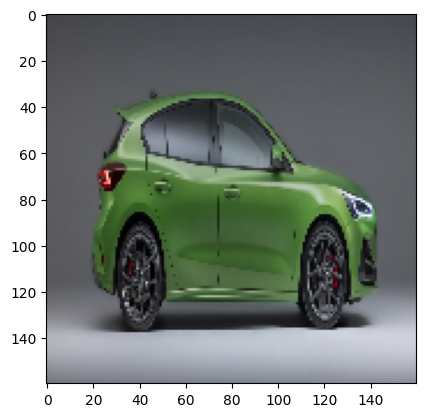

In [19]:
from tensorflow.keras.preprocessing import image as image_utils
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, target_size=(160,160))
    return image
image = load_and_scale_image('./drive/MyDrive/Colab Notebooks/test/hatch.jpg')
plt.imshow(image, cmap='gray')
image = image_utils.img_to_array(image)
image = image.reshape(1,160,160,3)
prediction = model.predict(image)
class_names = train_ds.class_names
import numpy as np
print(class_names[np.argmax(prediction)])

In [ ]:
print(prediction)
np.argmax(prediction)

[[8.1772189e-09 9.9526972e-01 4.7295168e-03 6.6114120e-07 3.3808514e-09]]


1

In [ ]:
rescale = keras.Sequential(Rescaling(1./255))
data_augmentation = keras.Sequential([
  RandomFlip("horizontal"),
  RandomZoom((0.1,0.15))
])

modelf = keras.Sequential([
    rescale,
    data_augmentation,
    Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_1'),
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_2'),
    Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_3'),
    Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_4'),
    Flatten(),
    Dense(units=128, activation="relu"),
    Dropout(0.3),
    Dense(units=5, activation="softmax", name='out')
])

modelf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=2,
                                        restore_best_weights=True)
epochs=10
historyf = modelf.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs,
  callbacks=[earlystopping]
)


Epoch 1/10
105/105 [==============================] - 360s 3s/step - loss: 1.1961 - accuracy: 0.6462 - val_loss: 15.5730 - val_accuracy: 0.1377
Epoch 2/10
105/105 [==============================] - 356s 3s/step - loss: 0.6004 - accuracy: 0.7609 - val_loss: 15.8793 - val_accuracy: 0.1377
Epoch 3/10
105/105 [==============================] - 358s 3s/step - loss: 0.4751 - accuracy: 0.8132 - val_loss: 9.6965 - val_accuracy: 0.2096
Epoch 4/10
105/105 [==============================] - 360s 3s/step - loss: 0.3467 - accuracy: 0.8734 - val_loss: 2.6595 - val_accuracy: 0.5281
Epoch 5/10
105/105 [==============================] - 359s 3s/step - loss: 0.3142 - accuracy: 0.8857 - val_loss: 4.4632 - val_accuracy: 0.4515
Epoch 6/10
105/105 [==============================] - 358s 3s/step - loss: 0.2465 - accuracy: 0.9066 - val_loss: 1.9848 - val_accuracy: 0.6275
Epoch 7/10
105/105 [==============================] - 355s 3s/step - loss: 0.2102 - accuracy: 0.9207 - val_loss: 1.8333 - val_accuracy: 0.66

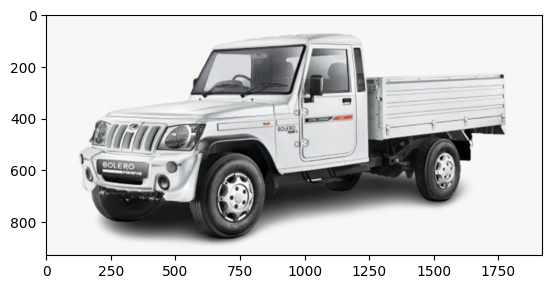

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

show_image('./drive/MyDrive/Colab Notebooks/test/pickup.jpg')

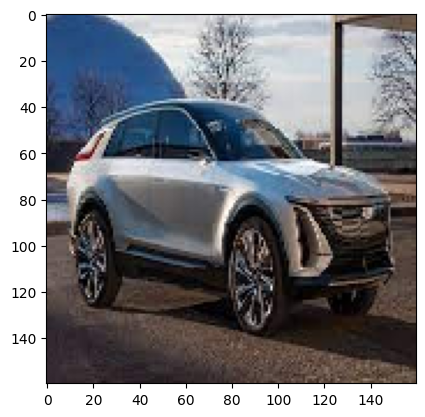

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, target_size=(160,160))
    return image
image = load_and_scale_image('./drive/MyDrive/Colab Notebooks/test/sd.jpg')
plt.imshow(image, cmap='gray')

In [ ]:
image = image_utils.img_to_array(image)
image = image.reshape(1,160,160,3)
prediction = modelf.predict(image)
class_names = train_ds.class_names
import numpy as np
print(class_names[np.argmax(prediction)])

1/1 [==============================] - 0s 38ms/step
Pickup


In [ ]:
print(prediction)
import numpy as np
np.argmax(prediction)

[[4.6146117e-16 1.0000000e+00 3.4204113e-08 2.4224943e-12 1.0571065e-09]]


1